# Single network analysis

In [1]:
import function as fn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ModuleNotFoundError: No module named 'function'

In [26]:
# general settings for charts
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

main_color = '#0000b3'
main_color2 = '#b30000'
secondary_color = '#b3b3ff'


In this file a single network is analysed. The options are:
* mathoverflow_{a2q, c2q, c2a}
* superuser_{a2q, c2q, c2a}
* askubuntu_{a2q, c2q, c2a}

In [27]:
dataset_options = {
    1 : 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2 : 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3 : 'data/mathoverflow/sx-mathoverflow-c2a.txt',
    4 : 'data/superuser/sx-superuser-a2q.txt',
    5 : 'data/superuser/sx-superuser-c2q.txt',
    6 : 'data/superuser/sx-superuser-c2a.txt',
    7 : 'data/askubintu/sx-askubintu-a2q.txt',
    8 : 'data/askubintu/sx-askubintu-c2q.txt',
    9 : 'data/askubintu/sx-askubintu-c2a.txt'
}

In [28]:
nodes, edges_per_t = fn.read_graph_from_file(dataset_options[1])

In [6]:
G_raw = fn.generate_aggregated_graph(nodes, edges_per_t)
nx.write_gpickle(G_raw, 'pickles/graphs/raw_graph.gpickle') # This so we dont have to compute it everytime 

In [20]:
edges_per_t_sec = fn.aggregate_edges_by_granularity(edges_per_t, 'sec')
edges_per_t_min = fn.aggregate_edges_by_granularity(edges_per_t, 'min')
edges_per_t_hour = fn.aggregate_edges_by_granularity(edges_per_t, 'hour')
edges_per_t_day = fn.aggregate_edges_by_granularity(edges_per_t, 'day')

In [8]:
G_sec = fn.generate_aggregated_graph(nodes, edges_per_t_sec)
nx.write_gpickle(G_sec, 'pickles/graphs/graph_sec.gpickle') # This so we dont have to compute it everytime 

In [20]:
G_min = fn.generate_aggregated_graph(nodes, edges_per_t_min)
nx.write_gpickle(G_min, 'pickles/graphs/graph_min.gpickle') # This so we dont have to compute it everytime 

In [20]:
G_hour = fn.generate_aggregated_graph(nodes, edges_per_t_hour)
nx.write_gpickle(G_hour, 'pickles/graphs/graph_hour.gpickle') # This so we dont have to compute it everytime 

In [20]:
G_day = fn.generate_aggregated_graph(nodes, edges_per_t_day)
nx.write_gpickle(G_day, 'pickles/graphs/graph_day.gpickle') # This so we dont have to compute it everytime 

In [20]:
G_sec = nx.read_gpickle('pickles/graphs/graph_sec.gpickle')
G_min = nx.read_gpickle('pickles/graphs/graph_min.gpickle')
G_hour = nx.read_gpickle('pickles/graphs/graph_hour.gpickle')
G_day = nx.read_gpickle('pickles/graphs/graph_day.gpickle')

In [20]:
G_info = G_sec
different_keys = []
total_edge_count = 0
#TODO: discuss what should be edges_test
edges_test = edges_per_t_hour
for k,v in edges_test.items():
    different_keys.append(k)
    total_edge_count += len(v)
print('Temporal edges (new granularity)', len(different_keys))
print('Temporal edges (new granularity)', len(different_keys))
print('Edges in static graph', len(G_info.edges()))
print(total_edge_count)

Temporal edges (new granularity) 44067
Temporal edges (new granularity) 44067
Edges in static graph 90465
107546


In [20]:
current_G = G_day
current_edges_per_t = edges_per_t_day
current_nodes = nodes
min_t = min([k for k in current_edges_per_t.keys()])
max_t = max([k for k in current_edges_per_t.keys()])

<BarContainer object of 2351 artists>

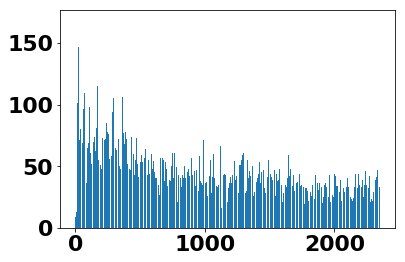

In [24]:
x = []
y = []
for k, v in current_edges_per_t.items():
    x.append(float(k))
    y.append(len(v))

plt.bar(x, y)

## Basic aggregated network analysis

In [24]:
G=G_hour
N = G.number_of_nodes()
E = G.number_of_edges()
link_density = nx.density(G)
assortativity = nx.degree_assortativity_coefficient(G)
clustering_coefficient = nx.average_clustering(G)
G_degrees = fn.get_graph_degrees(G)

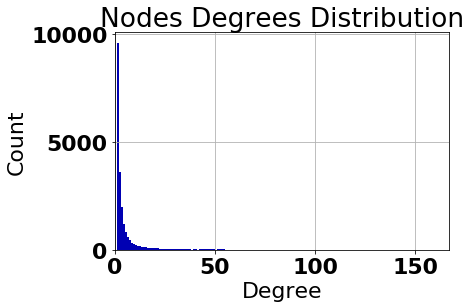

In [24]:
x = np.arange(1, len(G_degrees) + 1)
x, y = np.unique(G_degrees[:, 1], return_counts=True)
#plt.figure(figsize=(15, 8), dpi= 180, facecolor='w', edgecolor='k') 
plt.bar(x, y, width=1, align='edge', color=main_color)
#plt.plot(x_pow, y_pow, 'g-', linewidth=1, markersize=2)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Nodes Degrees Distribution')
plt.xlim((0, 167))
plt.grid(True)

In [25]:
def get_G_local_clustering(G):
    G_local_clustering = np.zeros((G.number_of_nodes(), 2))
    for k, v in nx.clustering(G).items():
        G_local_clustering[k-1, 0] = k
        G_local_clustering[k-1, 1] = v
    return G_local_clustering

In [26]:
G_local_clustering = get_G_local_clustering(G)
len(G_local_clustering)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [27]:
nx.is_connected(G)

NetworkXNotImplemented: not implemented for directed type

In [28]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not weakly connected.

In [29]:
nx.diameter(G)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [30]:
np.max(nx.adjacency_spectrum(G))

In [ ]:
nx.algebraic_connectivity(G)

In [36]:
print('Nodes: ', N)
print('Edges: ', E)
#print('Is connected?: ', nx.is_connected(G))
print('Link density: ', link_density)
print('Degree: ')
print(' - Mean: ', G_degrees[:,1].mean())
print(' - Variance: ', G_degrees[:,1].std()**2)
print(' - Std: ', G_degrees[:,1].std())
print('Assortativity: ', assortativity)
print('Clustering coefficient: ', clustering_coefficient)

Nodes:  21688
Edges:  90465
Link density:  0.00019233645335738634
Degree: 
 - Mean:  8.342401327923275
 - Variance:  1047.2306034553135
 - Std:  32.360942561293136
Assortativity:  -0.10280823705460189
Clustering coefficient:  0.05482156329065692


In [117]:
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edges_from([(1,2),(1,3)])
G.add_edge(2,1)
G.add_edge(3,1)
G.add_edge(2,3)

In [118]:
G.nodes()
G.edges()

OutEdgeView([(1, 2), (1, 3), (2, 1), (2, 3), (3, 1)])

In [120]:
[x for x in nx.neighbors(G, 1)]

[2, 3]

In [39]:
G.remove_edge(1,2)

## Information spreading process

In [100]:
iteration_range, all_processes_info = multiple_processes(current_nodes, current_edges_per_t, 'random', 5, -1)

0. Seed: 31130
1. Seed: 5016
2. Seed: 54736
3. Seed: 49778
4. Seed: 20947


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


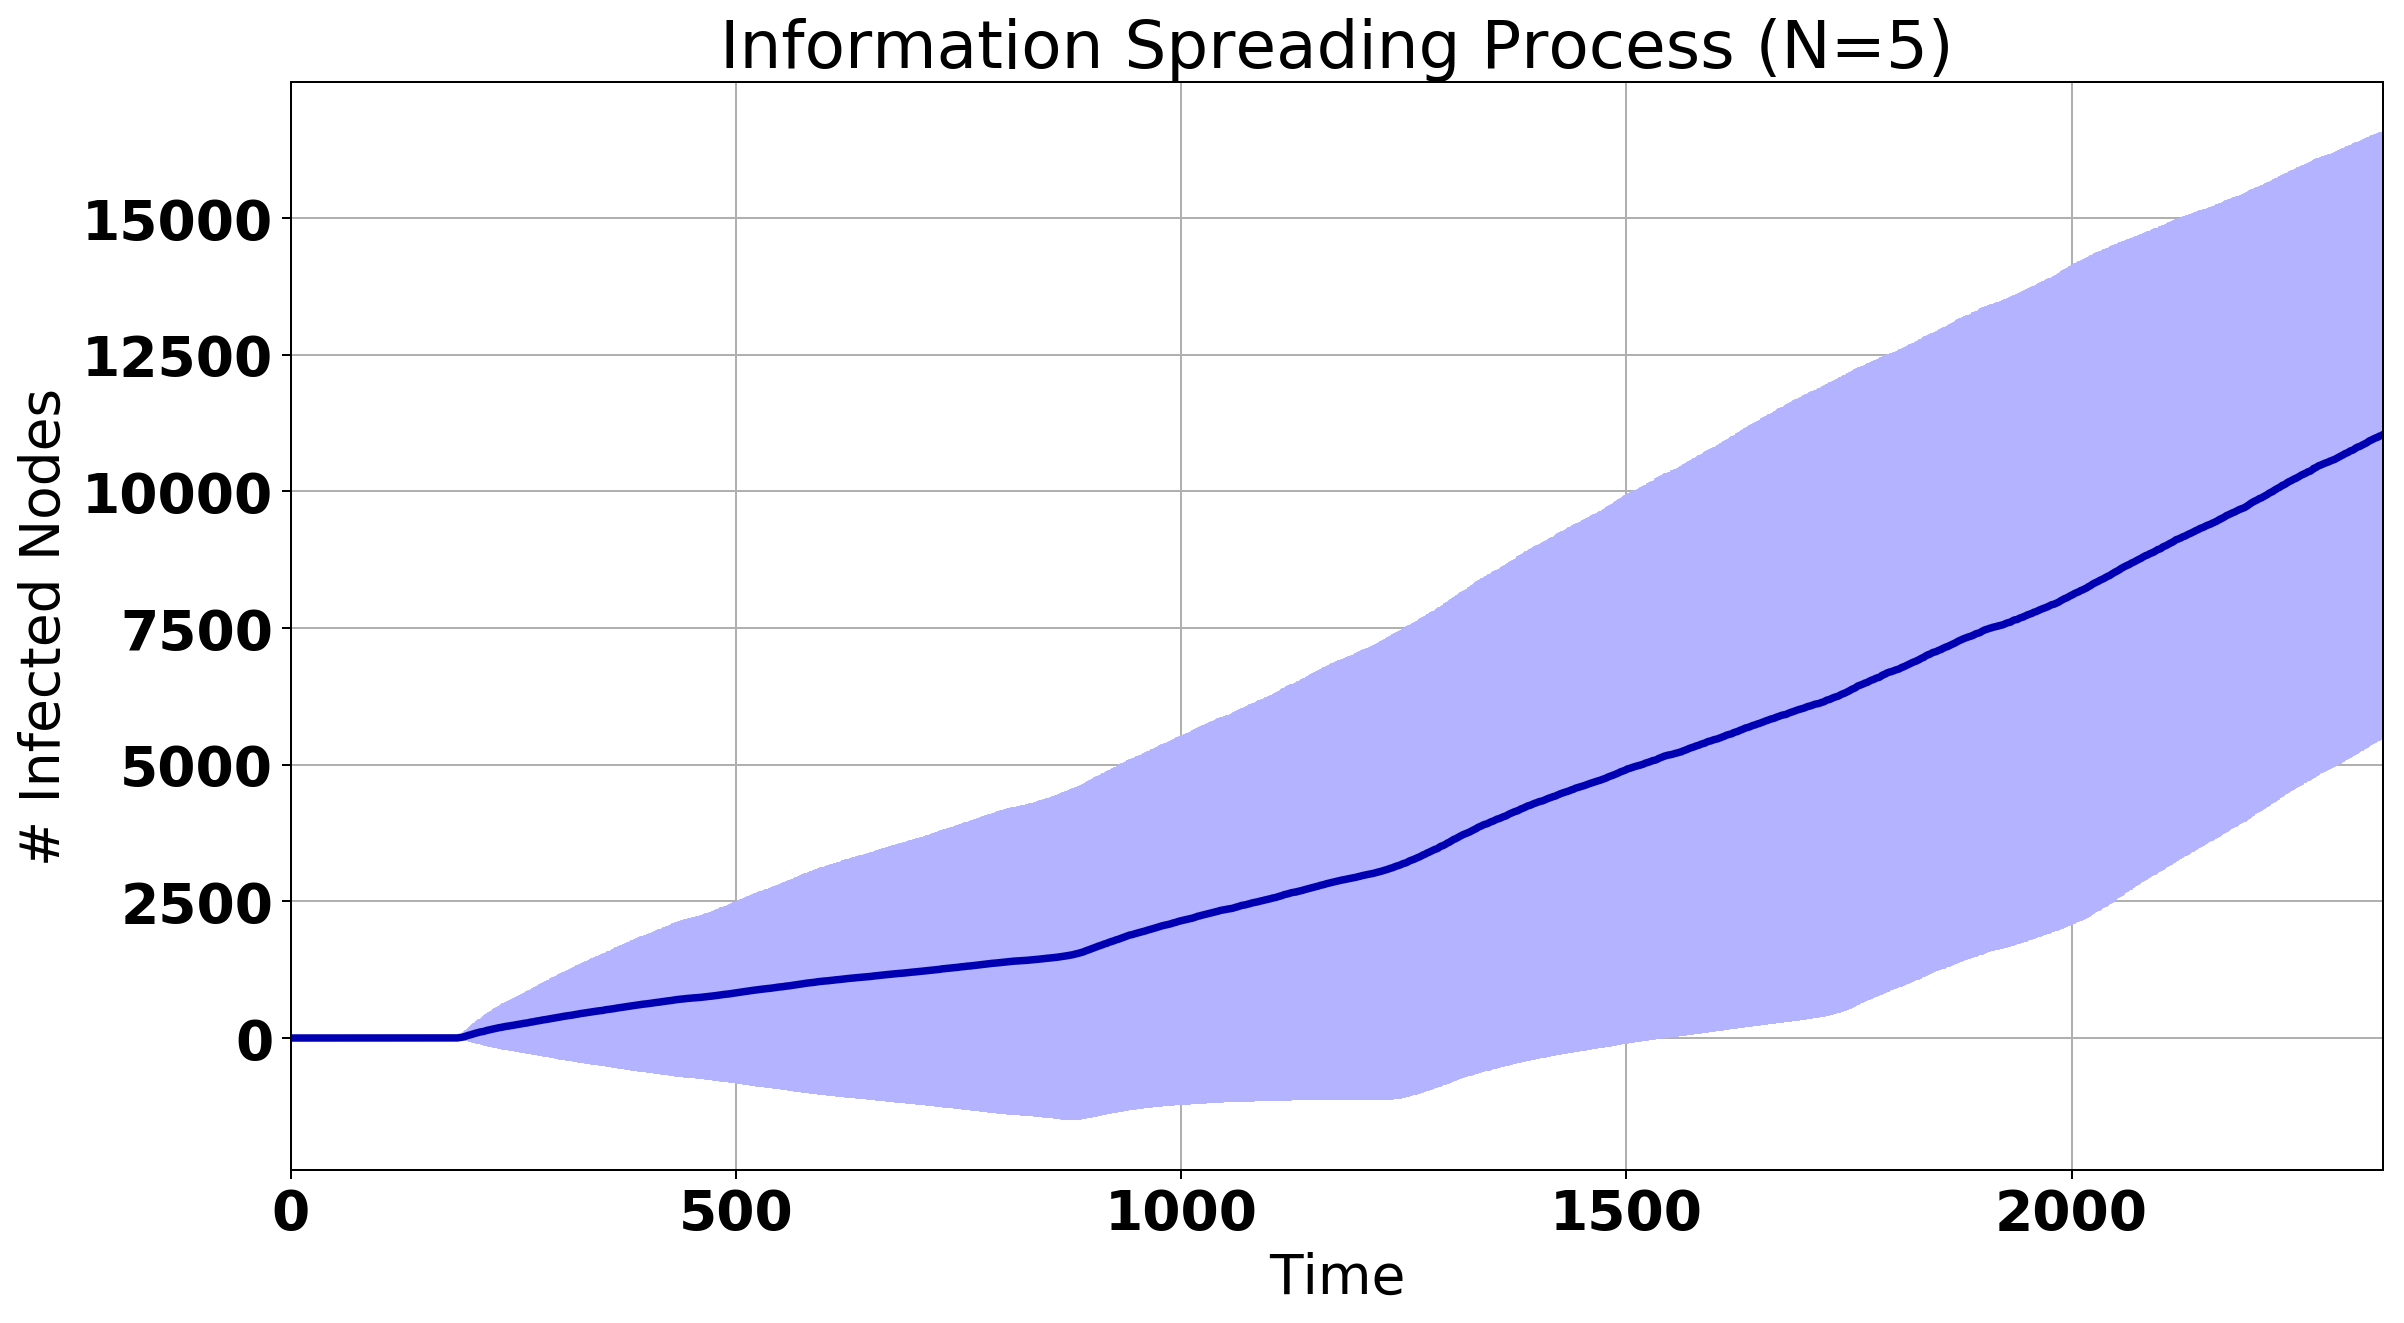

In [102]:
infectionProcessChart(True, all_processes_info, (min_t, max_t))

## Auxiliar functions

After these are working we can put them in the file 

In [74]:
def multiple_processes(nodes, temporal_edges, mode, iterations_limit, t_steps):  
    
    # Random permutation of nodes
    nodes_perm = np.random.permutation(np.asarray(nodes))
    
    # Fix number of iterations to run 
    t_iters = max(k for k, v in temporal_edges.items() if v != 0)
    if t_steps != -1:
        t_iters = t_steps
    
    # Initialize the array with the nodes that we are going to iterate
    if mode == 'all_nodes':
        iteration_range = np.arange(1,min(iterations_limit, len(nodes)) + 1)
    elif mode == 'random':
        iteration_range = nodes_perm[0:iterations_limit]#np.random.randint(1,len(nodes),iterations_limit)
        
    all_processes_info = np.ndarray((t_iters + 1, len(iteration_range)))
    
    for process_run_id in range(len(iteration_range)):
        
        # Graph initialization
        G = nx.DiGraph()
        G.add_nodes_from(nodes)
        nx.set_node_attributes(G, False, 'infected')     
        
        # Get seed node and infect it (t = 0)
        selected_node = iteration_range[process_run_id]
        G.nodes()[selected_node]['infected'] = True
        all_processes_info[0, process_run_id] = 1

        print(str(process_run_id) + '. Seed: ' + str(selected_node))
        
        infections_info = information_spreading_process(G, nodes, temporal_edges, t_iters)
        
        for i in range(len(infections_info)):
            all_processes_info[i+1,process_run_id] = infections_info[i]
        
        G.clear()
        
    return iteration_range, all_processes_info

In [71]:
def information_spreading_process(G, nodes, temporal_edges, t_iters):
        
    infections_per_step = []

    # Run iterations
    for t in range(1,t_iters+1):
        #print('New t step:' + str(t))
        update_graph_iteration(G, nodes, temporal_edges, t)
        #print(G.edges()) # should have new edges
        num_infected = infect_iteration(G)
        #process_info.append((t, num_infected))
        
        infections_per_step.append(num_infected)
    
    return infections_per_step

In [72]:
def update_graph_iteration(G, nodes, temporal_edges, t):
    prev_t = t -1
    if prev_t >= 1:
        old_edges = list(dict.fromkeys(temporal_edges[prev_t])) # removing duplicates
        for u,v in old_edges:
            G.remove_edge(u, v)
    new_edges = list(dict.fromkeys(temporal_edges[t])) # removing duplicates
    for u,v in new_edges:
        G.add_edge(u, v) 

In [73]:
def infect_iteration(G):
    infected_nodes = [x for x,y in G.nodes(data=True) if y['infected']==True]
    num_new_infected = 0
    for node in infected_nodes:
        #print('Evaluating: ' + str(node))
        for neighbor in nx.all_neighbors(G, node):            
            if not G.nodes()[neighbor]['infected']:
                G.nodes()[neighbor]['infected'] = True
                num_new_infected += 1
                #print('Infecting: ' + str(neighbor))
    return num_new_infected

In [98]:
def infectionProcessChart(for_report, processes_info, x_range):
    random_cumm_infections = processes_info.cumsum(axis=0)
    means = random_cumm_infections.mean(axis=1)
    stds = random_cumm_infections.std(axis=1)
    ts = np.arange(len(means))

    if for_report:
        plt.figure(figsize=(15, 8), dpi= 180, facecolor='w', edgecolor='k') 
    
    plt.errorbar(ts, means,yerr=stds, ecolor=secondary_color, color=main_color, linewidth=3)
    plt.xlabel('Time')
    plt.ylabel('# Infected Nodes')
    plt.xlim(x_range[0], x_range[1])
    plt.title('Information Spreading Process (N='+ str(processes_info.shape[1]) +')')
    plt.grid(True)